In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('online_retail_II.csv')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
#------------- Cleaning and Verification ------------------------
# Check for rows that do not have Customer ID and remove them
df.dropna(subset=['Customer ID'], inplace=True)

# Convert Customer ID from float to Integer values
df['Customer ID'] = df['Customer ID'].astype(int)

# Remove returned items with negative quantities.
df = df[df['Quantity'] > 0]

# Remove duplicate rows.
df.drop_duplicates(inplace=True)

# Convert InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
# Print cleaned data
print("--- Cleaned Data Info ---")
df.info()

# Let's get a new descriptive statistics summary.
print("\n--- Cleaned Data Description ---")
df.describe()

--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 779495 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Description  779495 non-null  object        
 3   Quantity     779495 non-null  int64         
 4   InvoiceDate  779495 non-null  datetime64[ns]
 5   Price        779495 non-null  float64       
 6   Customer ID  779495 non-null  int64         
 7   Country      779495 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 53.5+ MB

--- Cleaned Data Description ---


,Quantity,InvoiceDate,Price,Customer ID
count,779495.000000,779495,779495.000000,779495.000000
mean,13.507085,2011-01-03 01:46:36.061116416,3.218199,15320.262918
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000
50%,6.000000,2010-12-02 14:09:00,1.950000,15246.000000
75%,12.000000,2011-08-01 13:48:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000
std,146.540284,NaN,29.674823,1695.722988


OBSERVATION
The total number of entries is much lower than before.
The Customer ID column has the same number of non-null entries as all other columns.
The Dtype for InvoiceDate is now datetime64[ns].
The Dtype for Customer ID is now int64.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Feature Engineering
# Create a TotalPrice column by multiplying Quantity and Price
df['TotalPrice'] = df['Quantity'] * df['Price']

In [9]:
# --- 1. WHAT ARE OUR TOP-SELLING PRODUCTS? ---
# Groupping by product description and sum the quantities
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

In [10]:
# Print top 10 selling products
print("--- Top 10 Selling Products (by Quantity) ---")
print(top_products)

--- Top 10 Selling Products (by Quantity) ---
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: Quantity, dtype: int64


/var/folders/ln/d1lt__t12yb7vqs0x9c2jbqw0000gn/T/ipykernel_20302/1740308018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


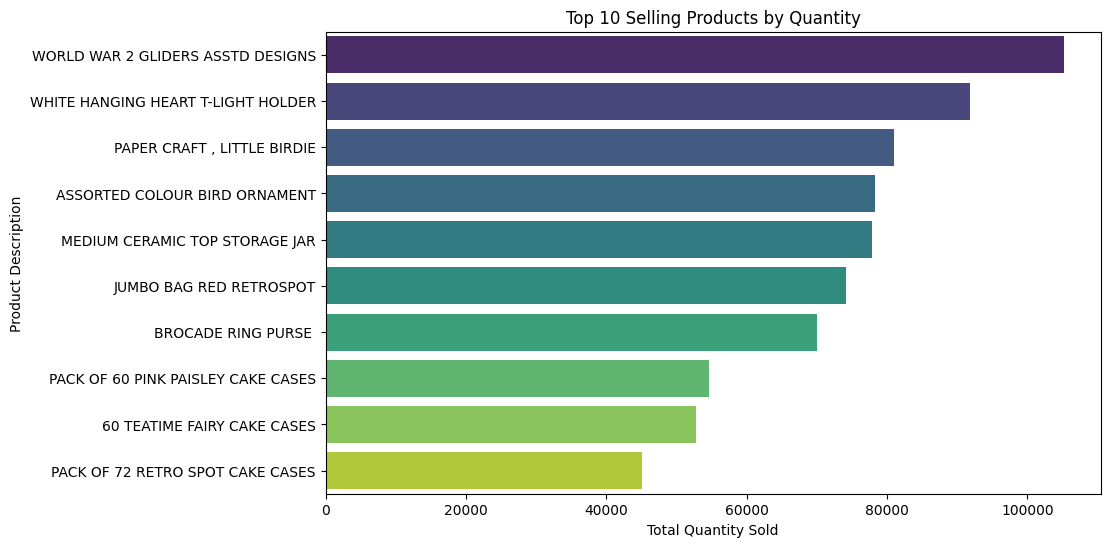

In [11]:
# Visualize the top 10 products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [12]:
# --- 2. HOW DO SALES TREND OVER TIME? ---
# Since We are dealing with time, I set the InvoiceDate as the index to work with time-series data
df_time = df.set_index('InvoiceDate')

In [13]:
# Resampling the data by month ('M') and sum the TotalPrice for each month
monthly_sales = df_time['TotalPrice'].resample('ME').sum()

In [14]:
print("\n--- Monthly Sales Revenue ---")
# Convert to a more readable format for printing
print(monthly_sales.to_frame().style.format("${:,.2f}"))


--- Monthly Sales Revenue ---


In [15]:
print("\n--- Monthly Sales Revenue ---")
monthly_sales.to_frame().style.format("${:,.2f}")


--- Monthly Sales Revenue ---


,TotalPrice
InvoiceDate,
2009-12-31 00:00:00,"$683,504.01"
2010-01-31 00:00:00,"$555,802.67"
2010-02-28 00:00:00,"$504,558.96"
2010-03-31 00:00:00,"$696,978.47"
2010-04-30 00:00:00,"$591,982.00"
2010-05-31 00:00:00,"$597,833.38"
2010-06-30 00:00:00,"$636,371.13"
2010-07-31 00:00:00,"$589,736.17"
2010-08-31 00:00:00,"$602,224.60"


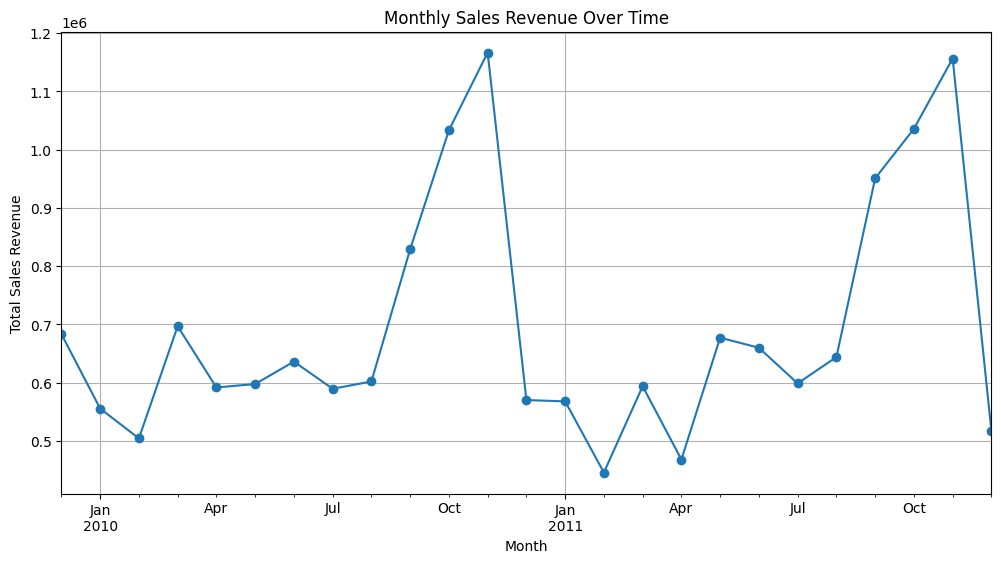

In [16]:
# Visualize the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.show()

In [17]:
# --- 3. WHICH COUNTRIES ARE OUR BIGGEST MARKETS? ---
# Group by country and sum the total price
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

In [18]:
print("\n--- Top 10 Countries by Sales Revenue ---")
print(sales_by_country.to_frame().style.format("${:,.2f}"))


--- Top 10 Countries by Sales Revenue ---


In [19]:
print("\n--- Top 10 Countries by Sales Revenue ---")
sales_by_country.to_frame().style.format("${:,.2f}")


--- Top 10 Countries by Sales Revenue ---


,TotalPrice
Country,
United Kingdom,"$14,389,234.92"
EIRE,"$616,570.54"
Netherlands,"$554,038.09"
Germany,"$425,019.71"
France,"$348,768.96"
Australia,"$169,283.46"
Spain,"$108,332.49"
Switzerland,"$100,061.94"
Sweden,"$91,515.82"


/var/folders/ln/d1lt__t12yb7vqs0x9c2jbqw0000gn/T/ipykernel_20302/3374610226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='plasma')


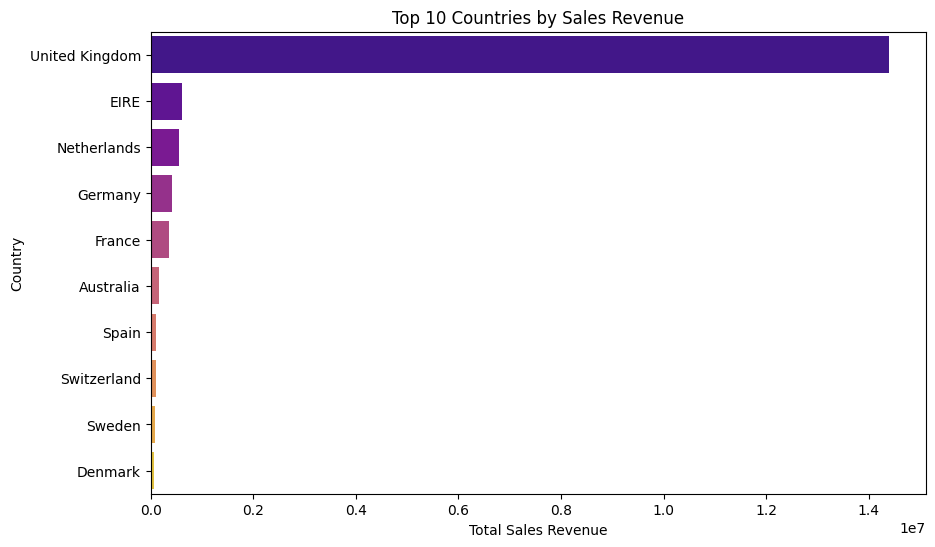

In [20]:
# Visualize the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='plasma')
plt.title('Top 10 Countries by Sales Revenue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Country')
plt.show()


In [21]:
from datetime import timedelta

In [22]:
# --- RFM CALCULATION ---

# To calculate Recency, we need a "snapshot date" which is the day after the last recorded transaction.
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

In [23]:
# Group data by each customer
rfm_data = df.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency: days since last purchase
    'Invoice': 'nunique',                                   # Frequency: number of unique invoices
    'TotalPrice': 'sum'                                     # Monetary: total spending
})

In [24]:
# Rename the columns to be more descriptive
rfm_data.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'TotalPrice': 'MonetaryValue'}, inplace=True)

In [25]:
# --- RFM SCORING ---
# We will rank customers into 5 groups (quintiles) for each metric.
# To handle cases where many customers have the same value (e.g., many people bought only once),
# we first rank the data. This assigns a unique rank to each customer and prevents errors with qcut.

# Note on Recency: A lower Recency value is better. So we want the group with the lowest values to get the highest score (5).
r_labels = range(5, 0, -1) # Creates labels [5, 4, 3, 2, 1]
f_labels = range(1, 6)     # Creates labels [1, 2, 3, 4, 5]
m_labels = range(1, 6)     # Creates labels [1, 2, 3, 4, 5]

In [26]:
# Create the score columns by applying qcut to the ranked data
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'].rank(method='first'), q=5, labels=r_labels).astype(int)
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), q=5, labels=f_labels).astype(int)
rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'].rank(method='first'), q=5, labels=m_labels).astype(int)

In [27]:
# Combine the scores into a single string
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

In [28]:
# Define segments based on regex matching of the RFM_Score
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'1[3-5]': 'At Risk',
    r'2[3-5]': 'Needs Attention',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Loyal Customers',
    r'[3-4][4-5]': 'Potential Loyalists',
    r'[4-5]1': 'New Customers',
    r'4[2-3]': 'Potential Loyalists',
    r'5[2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [29]:
rfm_data['Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str)
rfm_data['Segment'] = rfm_data['Segment'].replace(segment_map, regex=True)

# Let's see the first few rows of our final RFM table
print("--- RFM Data with Scores and Segments ---")
print(rfm_data.head())

--- RFM Data with Scores and Segments ---
             Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
Customer ID                                                                 
12346            326         12       77556.46        2        5        5   
12347              2          8        4921.53        5        4        5   
12348             75          5        2019.40        3        4        4   
12349             19          4        4428.69        5        3        5   
12350            310          1         334.40        2        1        2   

            RFM_Score              Segment  
Customer ID                                 
12346             255      Needs Attention  
12347             545            Champions  
12348             344  Potential Loyalists  
12349             535  Potential Loyalists  
12350             212          Hibernating  


/var/folders/ln/d1lt__t12yb7vqs0x9c2jbqw0000gn/T/ipykernel_20302/809429371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='rocket')


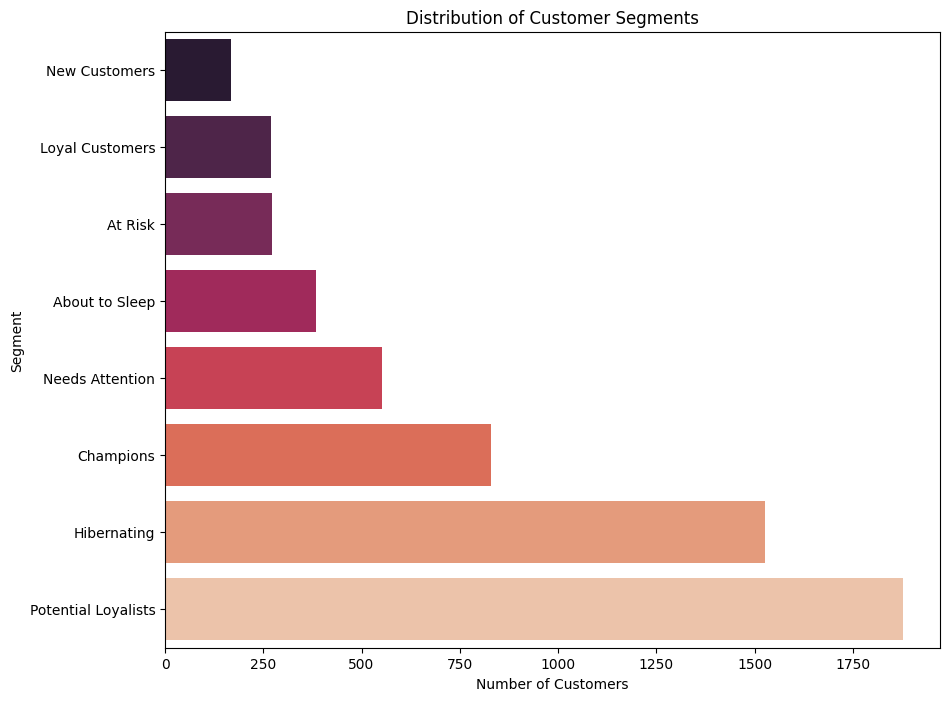

In [30]:
# --- VISUALIZE THE SEGMENTS ---

# Count the number of customers in each segment
segment_counts = rfm_data['Segment'].value_counts().sort_values(ascending=True)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='rocket')
plt.title('Distribution of Customer Segments')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.show()